<a href="https://colab.research.google.com/github/ezdanapak/Lab_5-ipynb/blob/main/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get Started

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ezdanapak/Lab_5-ipynb/blob/main/lab_05.ipynb)



# Lab 5

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [ ]:
import math

# Function
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Earth radius in kilometers
    radius = 6371

    # Distance in kilometers
    distance = radius * c
    return distance

# Coordinates for Tbilisi, Istanbul, and Baku
coordinates = [
    (41.7151, 44.8271),  # Tbilisi, Georgia
    (41.0082, 28.9784),  # Istanbul, Turkey
    (40.4093, 49.8671)   # Baku, Azerbaijan
]

# Calculate distances between the cities
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        lat1, lon1 = coordinates[i]
        lat2, lon2 = coordinates[j]
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        print(f"Distance between ({lat1}, {lon1}) and ({lat2}, {lon2}): {distance:.2f} km")


Distance between (41.7151, 44.8271) and (41.0082, 28.9784): 1323.16 km
Distance between (41.7151, 44.8271) and (40.4093, 49.8671): 446.72 km
Distance between (41.0082, 28.9784) and (40.4093, 49.8671): 1757.76 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [ ]:
import math

# Function to calculate the distance
def calculate_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])


    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))


    radius = 6371

    # Distance in kilometers
    distance = radius * c
    return distance

# Function to calculate distances between consecutive coordinates
def batch_distance_calculation(coordinates):
    distances = []
    for i in range(len(coordinates) - 1):
        lat1, lon1 = coordinates[i]
        lat2, lon2 = coordinates[i + 1]
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        distances.append(distance)
    return distances

# Test the function with a list of coordinates representing several cities
coordinates = [
    (41.7151, 44.8271),  # Tbilisi, Georgia
    (41.0082, 28.9784),  # Istanbul, Turkey
    (40.4093, 49.8671),  # Baku, Azerbaijan
    (52.5200, 13.4050),  # Berlin, Germany
    (48.8566, 2.3522)    # Paris, France
]

# Get the distances between consecutive pairs of cities
distances = batch_distance_calculation(coordinates)

# Print the results
for i in range(len(distances)):
    print(f"Distance between city {i+1} and city {i+2}: {distances[i]:.2f} km")


Distance between city 1 and city 2: 1323.16 km
Distance between city 2 and city 3: 1757.76 km
Distance between city 3 and city 4: 3057.33 km
Distance between city 4 and city 5: 877.46 km


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [ ]:
import math

# Function to calculate the distance between two geographic coordinates using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Earth radius in kilometers
    radius = 6371

    # Distance in kilometers
    distance = radius * c
    return distance

# Point class to represent a geographic point
class Point:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def distance_to(self, other_point):
        # Calculate the distance from this point to another point
        return calculate_distance(self.latitude, self.longitude, other_point.latitude, other_point.longitude)

# Instantiate several Point objects
tbilisi = Point("Tbilisi", 41.7151, 44.8271)
istanbul = Point("Istanbul", 41.0082, 28.9784)
baku = Point("Baku", 40.4093, 49.8671)
berlin = Point("Berlin", 52.5200, 13.4050)
paris = Point("Paris", 48.8566, 2.3522)

# Calculate distances between the points
points = [tbilisi, istanbul, baku, berlin, paris]

for i in range(len(points) - 1):
    point1 = points[i]
    point2 = points[i + 1]
    distance = point1.distance_to(point2)
    print(f"Distance between {point1.name} and {point2.name}: {distance:.2f} km")


Distance between Tbilisi and Istanbul: 1323.16 km
Distance between Istanbul and Baku: 1757.76 km
Distance between Baku and Berlin: 3057.33 km
Distance between Berlin and Paris: 877.46 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [ ]:
def read_coordinates(filename):
    coordinates = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                try:
                    # Split the line by comma or space and convert to float
                    lat, lon = map(float, line.strip().split(','))
                    coordinates.append((lat, lon))
                except ValueError:
                    print(f"Warning: Skipping invalid line in file: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
    return coordinates


def write_coordinates(filename, coordinates):
    try:
        with open(filename, 'w') as file:
            for lat, lon in coordinates:
                file.write(f"{lat},{lon}\n")
    except IOError as e:
        print(f"Error: Unable to write to file '{filename}'. {e}")
    except Exception as e:
        print(f"An unexpected error occurred while writing to the file: {e}")


# Example Usage
coordinates_to_write = [
    (41.7151, 44.8271),  # Tbilisi
    (41.0082, 28.9784),  # Istanbul
    (40.4093, 49.8671)   # Baku
]

# Write coordinates to a file
write_coordinates('coordinates_output.txt', coordinates_to_write)

# Read coordinates from a file
coordinates_read = read_coordinates('coordinates_output.txt')
print(f"Coordinates read from the file: {coordinates_read}")


Coordinates read from the file: [(41.7151, 44.8271), (41.0082, 28.9784), (40.4093, 49.8671)]


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [ ]:
import math

# Function to calculate the distance between two geographic coordinates using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    radius = 6371  # Earth radius in kilometers
    distance = radius * c
    return distance

# Point class to represent a geographic point
class Point:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def distance_to(self, other_point):
        return calculate_distance(self.latitude, self.longitude, other_point.latitude, other_point.longitude)

# Function to read coordinates from a file and calculate the distances between consecutive points
def read_and_calculate_distances(input_filename, output_filename):
    points = []
    try:
        with open(input_filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                try:
                    lat, lon = map(float, line.strip().split(','))
                    points.append(Point(f"Point({lat},{lon})", lat, lon))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")

        distances = []
        for i in range(len(points) - 1):
            distance = points[i].distance_to(points[i + 1])
            distances.append(f"Distance between {points[i].name} and {points[i + 1].name}: {distance:.2f} km")

        with open(output_filename, 'w') as output_file:
            output_file.write("\n".join(distances))
        print(f"Distances have been written to '{output_filename}'.")

    except FileNotFoundError:
        print(f"Error: The file '{input_filename}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Sample data for the input file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

# Output file name
input_file = "coordinates.txt"
output_file = "distances.txt"

# Create the sample file
try:
    with open(input_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{input_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

# Read the coordinates from the file and calculate distances
read_and_calculate_distances(input_file, output_file)


Sample file 'coordinates.txt' has been created successfully.
Distances have been written to 'distances.txt'.


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [ ]:
import math

# Function to calculate the distance between two geographic coordinates using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    try:
        # Convert latitude and longitude from degrees to radians
        lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.asin(math.sqrt(a))

        # Earth radius in kilometers
        radius = 6371

        # Distance in kilometers
        distance = radius * c
        return distance
    except Exception as e:
        print(f"Error during distance calculation: {e}")
        return None

# Function to calculate distances between consecutive coordinates
def batch_distance_calculation(coordinates):
    distances = []
    for i in range(len(coordinates) - 1):
        try:
            lat1, lon1 = coordinates[i]
            lat2, lon2 = coordinates[i + 1]

            # Ensure the coordinates are valid numbers
            if not all(isinstance(coord, (int, float)) for coord in [lat1, lon1, lat2, lon2]):
                print(f"Skipping invalid coordinates: {coordinates[i]} or {coordinates[i + 1]}")
                continue

            # Calculate the distance
            distance = calculate_distance(lat1, lon1, lat2, lon2)
            if distance is not None:
                distances.append(distance)
        except Exception as e:
            print(f"Error processing coordinates {coordinates[i]} and {coordinates[i + 1]}: {e}")

    return distances

# Example coordinates to test the function
coordinates = [
    (41.7151, 44.8271),  # Tbilisi, Georgia
    (41.0082, 28.9784),  # Istanbul, Turkey
    (40.4093, 49.8671),  # Baku, Azerbaijan
    (52.5200, 13.4050),  # Berlin, Germany
    (48.8566, 2.3522),   # Paris, France
    (0,), # Invalid entry for testing
    (51.5074, -0.1278),  # London, UK
    (40.730610, -73.935242)  # New York, USA
]

# Calculate the distances and print the result
distances = batch_distance_calculation(coordinates)
print(f"Distances: {distances}")


Error processing coordinates (48.8566, 2.3522) and (0,): not enough values to unpack (expected 2, got 1)
Error processing coordinates (0,) and (51.5074, -0.1278): not enough values to unpack (expected 2, got 1)
Distances: [1323.15710922207, 1757.759795023776, 3057.330913698224, 877.4633259175432, 5564.3330194542195]


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [ ]:
import numpy as np

# Coordinates for the cities (latitude, longitude)
cities = np.array([
    [35.6895, 139.6917],  # Tokyo
    [40.7128, -74.0060],  # New York
    [51.5074, -0.1278],   # London
    [48.8566, 2.3522]     # Paris
])

# Convert the latitude and longitude values from degrees to radians
cities_radians = np.radians(cities)

# Coordinates of Tokyo (in radians)
tokyo_radians = cities_radians[0]

# Calculate the element-wise difference between Tokyo and the other cities
differences = cities_radians[1:] - tokyo_radians

# Print the results
print("Cities (latitude, longitude) in radians:")
print(cities_radians)
print("\nElement-wise difference between Tokyo and the other cities:")
print(differences)


Cities (latitude, longitude) in radians:
[[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]

Element-wise difference between Tokyo and the other cities:
[[ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [ ]:
import pandas as pd

# Load the dataset from the URL
url = 'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Filter cities with a population greater than 1 million
cities_over_1m = df[df['population'] > 1000000]
print("\nCities with a population greater than 1 million:")
print(cities_over_1m.head())

# Group by country and calculate the total population for each country
population_by_country = df.groupby('country')['population'].sum().sort_values(ascending=False)
print("\nTotal population by country:")
print(population_by_country.head())

# Sort cities by population in descending order and display the top 10 cities
top_10_cities = df.sort_values(by='population', ascending=False).head(10)
print("\nTop 10 cities by population:")
print(top_10_cities[['name', 'country', 'population']])


First 5 rows of the dataset:
   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062

Missing values in each column:
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64

Cities with a population greater than 1 million:
      id            name country  latitude  longitude  population
97    98           Turin     ITA  45.07039    7.66996     1652000
103  104           Lille     FRA  50.64997    3.08001     1044000
123  124  San Bernardino     USA  34.12038 -117.30003     1745000
124  125      Bridgeport     USA  41.17998  -73.19996     1018000
126  127      Manchester     GBR  53.50042   -2.24799     2230000

Total population by cou

## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

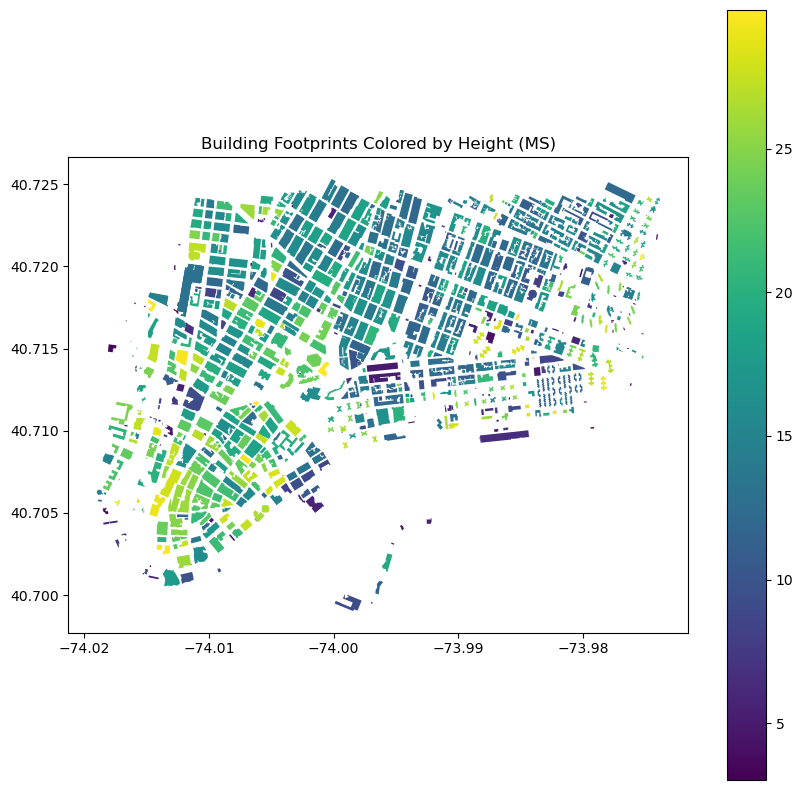

Average Building Height: 15.454691136974038 meters
Buildings with height greater than the average: 524
Filtered GeoDataFrame has been saved to 'buildings_above_average_height.geojson'.


In [ ]:
import geopandas as gpd
import folium
from folium import Choropleth
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt

# Step 1: Load the GeoJSON file
url = 'https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson'  # Replace with the actual URL if different
gdf = gpd.read_file(url)

# Step 2: Plot the building footprints, colored by building height (height_MS column)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='height_MS', cmap='viridis', legend=True, ax=ax)
ax.set_title('Building Footprints Colored by Height (MS)')
plt.show()

# Step 3: Create an interactive map using folium
# Create a base map centered around New York City (latitude, longitude)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add buildings to the interactive map and color them based on height
for _, row in gdf.iterrows():
    color = plt.cm.viridis(row['height_MS'] / gdf['height_MS'].max())  # Normalize color based on height
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, color=color: {
            'fillColor': rgb2hex((color[0], color[1], color[2])),  # Use normalized RGBA values
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7
        }
    ).add_to(m)

# Save the interactive map to an HTML file
m.save('building_footprints_map.html')

# Step 4: Calculate the average building height (height_MS column)
average_height = gdf['height_MS'].mean()
print(f'Average Building Height: {average_height} meters')

# Step 5: Select buildings with height greater than the average
buildings_above_average = gdf[gdf['height_MS'] > average_height]
print(f'Buildings with height greater than the average: {len(buildings_above_average)}')

# Step 6: Save the filtered GeoDataFrame to a new GeoJSON file
buildings_above_average.to_file('buildings_above_average_height.geojson', driver='GeoJSON')

print("Filtered GeoDataFrame has been saved to 'buildings_above_average_height.geojson'.")


## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

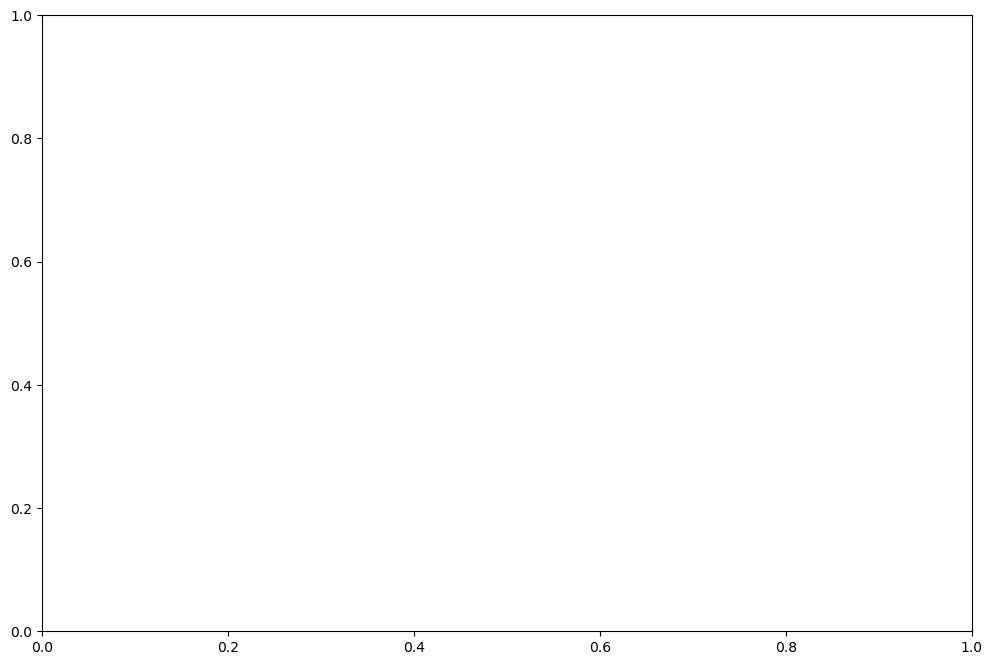

In [ ]:
# Import libraries
import pandas as pd
import geopandas as gpd
from geopandas.datasets import get_path
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
url = 'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
df = pd.read_csv(url)

# Step 2: Filter cities with latitude between -40 and 60
filtered_df = df[(df['latitude'] >= -40) & (df['latitude'] <= 60)]

# Step 3: Create a GeoDataFrame from filtered DataFrame
gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['longitude'], filtered_df['latitude']),
    crs="EPSG:4326"
)

# Step 4: Reproject to Mercator (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Step 5: Define Paris coordinates (longitude, latitude)
paris = gpd.GeoSeries([Point(2.3522, 48.8566)], crs="EPSG:4326").to_crs(epsg=3857)

# Step 6: Calculate distance from Paris (in meters)
gdf['distance_to_paris'] = gdf.geometry.distance(paris.iloc[0])

# Step 7: Plot the cities on a map, coloring by distance
fig, ax = plt.subplots(figsize=(12, 8))
world = gpd.read_file(get_path('naturalearth_lowres')).to_crs(epsg=3857)

# Plot base map
world.plot(ax=ax, color='lightgray')

# Plot cities colored by distance to Paris
gdf.plot(
    ax=ax,
    column='distance_to_paris',
    cmap='viridis',
    legend=True,
    markersize=10
)

ax.set_title('Cities Colored by Distance to Paris', fontsize=15)
plt.axis('off')
plt.show()


## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.